In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np

In [6]:
n = 10
s = '1010110101'

In [8]:
def oracle(n):
    qc_oracle = QuantumCircuit(n+1)
    for i in range(n):
        if s[i] == '1':
            qc_oracle.cx(i,n)
    oracle_gate = qc_oracle.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [13]:
qc = QuantumCircuit(n+1,n)
qc.x(n)
for i in range(n+1):
    qc.h(i)

qc.append(oracle(n),range(n+1))

for i in range(n):
    qc.h(i)

for i in range(n):
    qc.measure(i,i)

In [14]:
qc.draw()

┌───┐     ┌──────────┐┌───┐┌─┐                           
 q_0: ┤ H ├─────┤0         ├┤ H ├┤M├───────────────────────────
      ├───┤     │          │├───┤└╥┘┌─┐                        
 q_1: ┤ H ├─────┤1         ├┤ H ├─╫─┤M├────────────────────────
      ├───┤     │          │├───┤ ║ └╥┘┌─┐                     
 q_2: ┤ H ├─────┤2         ├┤ H ├─╫──╫─┤M├─────────────────────
      ├───┤     │          │├───┤ ║  ║ └╥┘┌─┐                  
 q_3: ┤ H ├─────┤3         ├┤ H ├─╫──╫──╫─┤M├──────────────────
      ├───┤     │          │├───┤ ║  ║  ║ └╥┘┌─┐               
 q_4: ┤ H ├─────┤4         ├┤ H ├─╫──╫──╫──╫─┤M├───────────────
      ├───┤     │          │├───┤ ║  ║  ║  ║ └╥┘┌─┐            
 q_5: ┤ H ├─────┤5  Oracle ├┤ H ├─╫──╫──╫──╫──╫─┤M├────────────
      ├───┤     │          │├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐         
 q_6: ┤ H ├─────┤6         ├┤ H ├─╫──╫──╫──╫──╫──╫─┤M├─────────
      ├───┤     │          │├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q_7: ┤ H ├─────┤7         ├┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├──────
      ├───┤     │          │├───┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_8: ┤ H ├─────┤8         ├┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤     │          │├───┤ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_9: ┤ H ├─────┤9         ├┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌───┐│          │└───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
q_10: ┤ X ├┤ H ├┤10        ├──────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘└───┘└──────────┘      ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
c: 10/════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                                  0  1  2  3  4  5  6  7  8  9

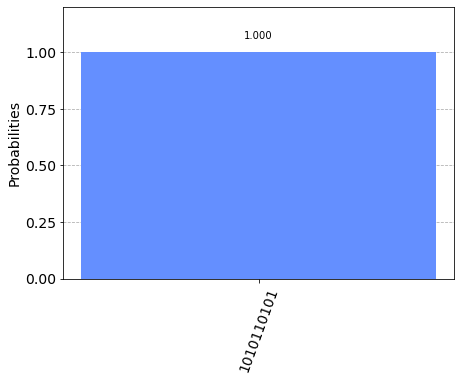

In [15]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc,backend=backend,shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)